In [1]:
import numpy as np
import mplstereonet as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from plots import *

%matplotlib inline

In [2]:
def generate_structures(mu_dir, sigma_dir, mu_dip,sigma_dip, size=500,litho=None):
    behaved =  int(size-size*0.2)
    dr = np.random.normal(mu_dir, sigma_dir,behaved)
    dr = np.array([int(i) for i in dr])
    dp = np.random.normal(mu_dip, sigma_dip, behaved)
    dp = np.array([int(i) for i in dp])

    #add some noise to it
    dipdir = np.hstack([dr, np.random.randint(dr.min()-2*sigma_dir,dr.max()+2*sigma_dir,size-behaved)])
    dip = np.hstack([dp, np.random.randint(dp.min()-2*sigma_dip,dp.max()+2*sigma_dip,size-behaved)])

    if litho is None:
        litho = ['Quartzite','Schist','Itabirite','Slate']

    assert dipdir.shape[0] % len(litho) ==0, 'Size must be proportional to lito len'
    litho = int(dipdir.shape[0]/len(litho)) * litho

    df = pd.DataFrame(data=np.array([dipdir, dip]).T, columns=['dipdir','dip'])
    df['litho']=litho

    for idx in range(df.shape[0]):
        if df.loc[idx,'dip'] > 90 and df.loc[idx,'dipdir'] >= 180:
            df.at[idx,'dipdir'] = df.at[idx,'dipdir'] - 180
            df.at[idx,'dip'] = 180 - df.at[idx,'dip'] 
        elif df.loc[idx,'dip'] > 90 and df.loc[idx,'dipdir'] < 180:
            df.at[idx,'dipdir'] = df.at[idx,'dipdir'] + 180
            df.at[idx,'dip'] = 180 - df.at[idx,'dip']
            
    df.dipdir = np.array([i-360 if i >360 else i for i in  df.dipdir])
    return df 

In [3]:
mu_dir, sigma_dir, mu_dip,sigma_dip = 355,10,84,5
data = generate_structures(mu_dir, sigma_dir, mu_dip,sigma_dip)
data

,dipdir,dip,litho
0,347,85,Quartzite
1,360,90,Schist
2,343,75,Itabirite
3,354,76,Slate
4,13,86,Quartzite
...,...,...,...
495,28,57,Slate
496,33,83,Quartzite
497,308,71,Schist
498,13,62,Itabirite


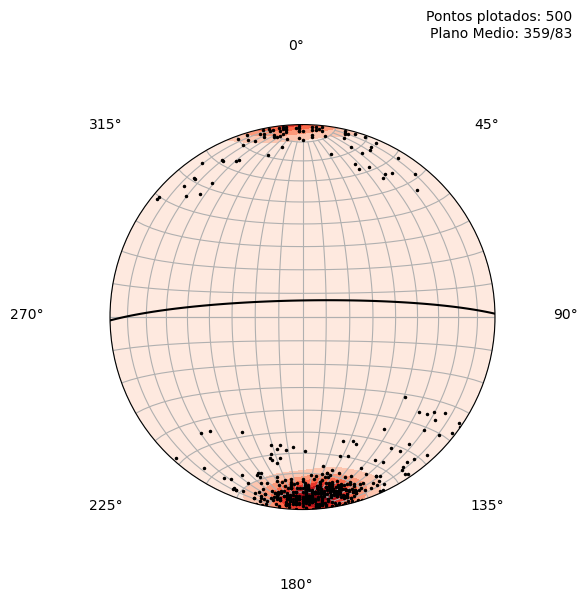

In [4]:
simple_stereogram(data['dipdir'], data['dip'])

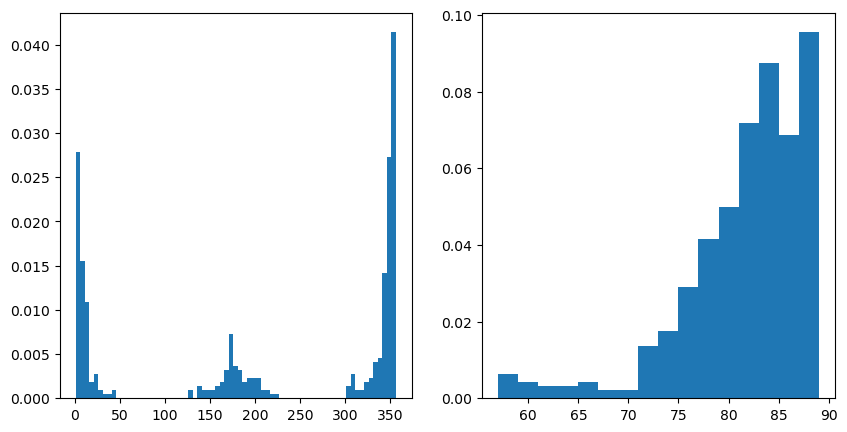

In [5]:
simple_strcuture_hist(data['dipdir'], data['dip'])